<a href="https://colab.research.google.com/github/Rishav-hub/Auto-ViML/blob/main/04_AutoVIML_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation
```pip install git+https://github.com/AutoViML/Auto_ViML.git```

or 

```pip install autoviml```

In [ ]:
!pip install autoviml

In [ ]:
!pip install featuretools

## Implementation with Auto-ViML

In [1]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


## Load Dataset

In [2]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8,307.00,130.00,3504,12.00,70,usa,chevrolet chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,usa,buick skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,usa,plymouth satellite
3,16.00,8,304.00,150.00,3433,12.00,70,usa,amc rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,usa,ford torino


## Split Dataset

In [3]:
num = int(0.9*df.shape[0])
train = df[:num]
print(train.shape)
test = df[num:]
print(test.shape)

(358, 9)
(40, 9)


## Initiating Auto ViML

- **train**: It should contain the location of your dataset or if you have loaded it in a dataframe then the name of the dataframe. In this article we have loaded it in a dataframe named ‘df’ so we will set is as ‘df’.
- **target**: It contains the name of the target variable. In our case, the target variable name is “TenYearCHD”.
- **test**: It contains the test dataset. We can also leave it blank like this “” if we do not have any test dataset so that it will split the train dataset int train and test.
- **sample_submission**: We will leave it empty so that it will automatically create submission in our local directory.
hyper_param: We will randomized search cv because it is 3X faster than Grid Search CV. We need to set this as “RS”.
- **feature_reduction**: We will set this as true so that it will take into consideration the most important predictor variable for model creation.
- **scoring_parameter**: You can give your own parameter for scoring or otherwise it will assume appropriate according to the model. We will use “Weighted-f1” here.
- **KMeans_featurizer**: This should be true for linear and False for XGboost or random classifier because it can lead to overfitting.
- **boosting_flag**: Used for boosting. Here we will keep it as False.
- **binning_flag**: By default, it is False and can be set to True when we want to convert the top numeric variables into binned variables.
- **add_poly**: We will set it as false.
- **stacking_flag**: By default it is False. If set to True, it will add an additional feature which is derived from predictions of another model. We will keep it as False.
- **Imbalanced_flag**: It will check data imbalance if set to TRUE and will remove data imbalance using SMOTING technique.
- **Verbose**: Generally used to print the steps that are performed. We will set it as 3.

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (358, 9)
    Training Set Memory Usage = 0.02 MB
Test Set Shape = (40, 9)
    Test Set Memory Usage = 0.00 MB
Single_Label Target: ['mpg']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Column

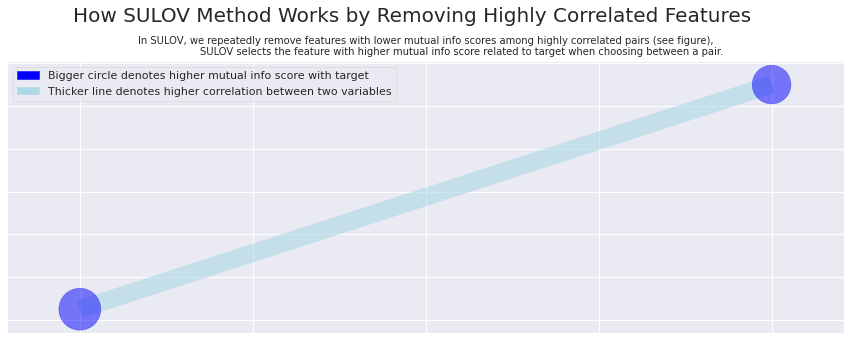

Splitting selected features into float and categorical (integer) variables:
    (2) float variables ...
    (6) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 8 
    Finding Important Features using Boosted Trees algorithm...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 8 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  322 , CV rows =  36
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
#########

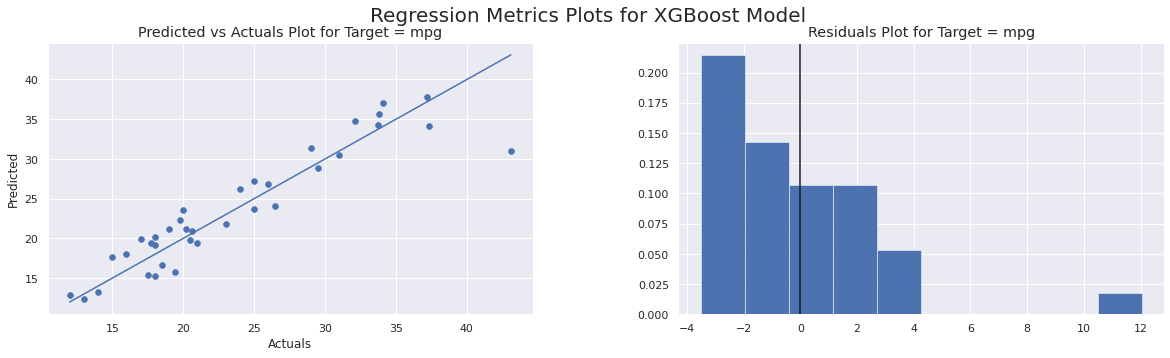

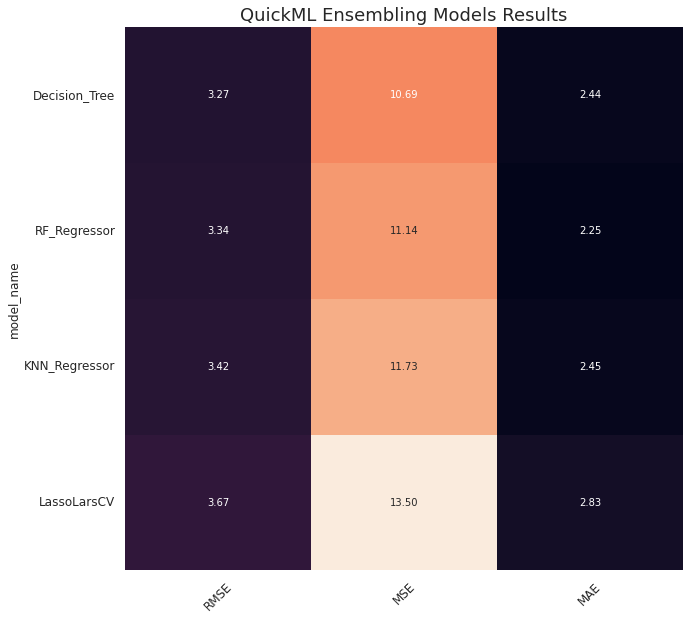

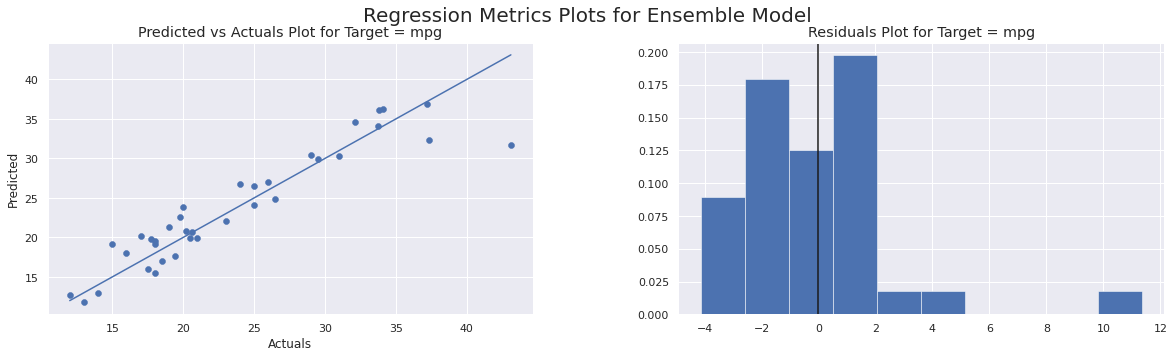

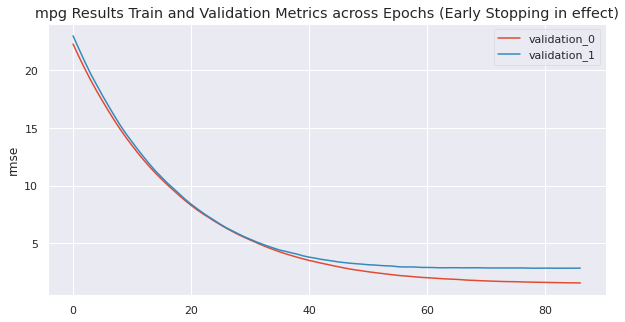

    Time taken for this Target (in seconds) = 37
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 37
Writing Output files to disk...
    Saving predictions to ./mpg/mpg_Regression_test_modified.csv
    Saving predictions to ./mpg/mpg_Regression_submission.csv
    Saving 

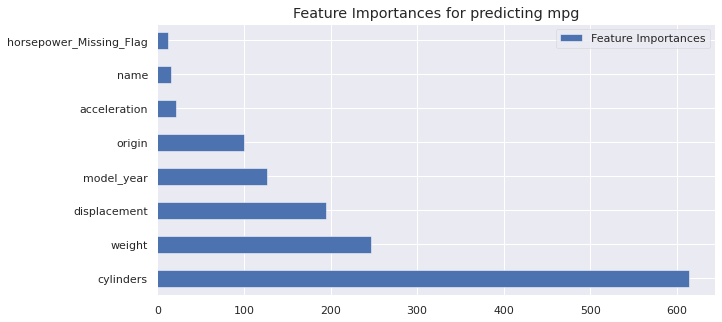

In [4]:
model, features, trainm, testm = Auto_ViML(
    train=train,
    target="mpg",
    test=test,
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="RMSE",
    Boosting_Flag=True,
    verbose=1
)